# Task

Make the computer applications drawing:

1. Barnsley fern
2. Mandelbrot fractal
3. your own fractal

# Fractals

## Barnsley

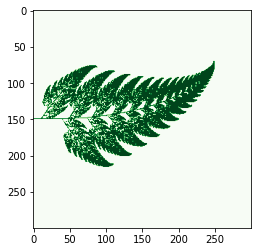

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def f1_stem(x, y):
    return 0, 0.16*y

def f2_leaflets(x, y):
    return 0.85*x + 0.04*y, -0.04*x + 0.85*y + 1.6

def f3_left_leaflet(x, y):
    return 0.2*x - 0.26*y , 0.23*x + 0.22*y + 1.6

def f4_right_leaflet(x, y):
    return -0.15*x + 0.28*y, 0.26*x + 0.24*y + 0.44

functions = [f1_stem, f2_leaflets, f3_left_leaflet, f4_right_leaflet]

points = 100000
width = height = 300
barnsley_fractal = np.zeros((width, height))
x = y = 0

for point in range(points):
    chosen_function = np.random.choice(functions, p=[0.01, 0.85, 0.07, 0.07])
    x, y = chosen_function(x,y)
    ix, iy = int(width/2 + x*width/10), int(y*height/12)
    barnsley_fractal[ix, iy] = 1
plt.imshow(barnsley_fractal[::-1,:], cmap=plt.cm.get_cmap("Greens"))

now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H:%M:%S")
plt.savefig(f'barnsley-{current_time}.png')
plt.show()

## Mandelbrot

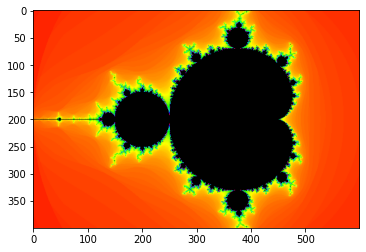

In [9]:
from PIL import Image, ImageDraw
from math import log, log2
from datetime import datetime
from matplotlib.pyplot import imshow

max_iterations = 80

def mandelbrot(c):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z*z + c  # f(z) = z^2 + c
        n += 1

    if n == max_iterations:
        return max_iterations

    return n + 1 - log(log2(abs(z)))

# Image size (pixels)
width = 600
height = 400

# Plot window
re_start = -2
re_end = 1
im_start = -1
im_end = 1

# image objects
im = Image.new('HSV', (width, height))
draw = ImageDraw.Draw(im)

for x in range(0, width):
    for y in range(0, height):
        # Convert pixel coordinate to complex number
        c = complex(re_start + (x / width) * (re_end - re_start),
                    im_start + (y / height) * (im_end - im_start))
        # Compute the number of iterations
        m = mandelbrot(c)
        # The color depends on the number of iterations
        hue = int(255 * m / max_iterations)
        saturation = 255
        value = 255 if m < max_iterations else 0
        # Plot the point
        draw.point([x, y], (hue, saturation, value))
# im.show()  # uncomment to show on a separate screen

now = datetime.now()
current_time = now.strftime("%Y-%m-%d-%H:%M:%S")
file_name = f'mandelbrot-{current_time}.png'
im.convert('RGB').save(file_name, 'PNG')
pil_im = Image.open(file_name, 'r')
imshow(np.asarray(pil_im))


## Wu Xing's fractal

In [11]:
import turtle

turtle_obj = turtle.Turtle()

# set to maximum speed
turtle_obj.speed(0)
turtle_obj.getscreen().bgcolor("black")
turtle_obj.penup()
# color array for Wu Xing's five phases
colors = ['green', 'yellow', 'blue', 'red', 'white']

# move the turtle and start drawing
turtle_obj.goto((-200, 50))
turtle_obj.pendown()

def draw_pentagram(obj, size):
    """
    Draws pentagram recursively
    :param obj: Turtle object
    :type obj: turtle.Turtle
    :param size: pentagram size
    :type size: float
    :return: None
    """
    # recursion stop condition
    if size <= 5:
        return
    else:
        # iterate 5 times for pentagram shape
        for _ in range(5):
            # moving turtle forward
            obj.forward(size/4)
            # recursive call
            draw_pentagram(obj, size/3)
            # moving turtle left with the angle of 216
            obj.left(216)

# calling the draw function 5 times for each point/phase
for i in range(5):
    turtle_obj.color(colors[i])
    draw_pentagram(turtle_obj, 360.0)
    # move away for another set of pentagrams
    turtle_obj.forward(360)
    turtle_obj.left(216)
turtle.done()


TclError: invalid command name ".!canvas"